# Q1


In [67]:
def counting_measure(user_set):
    
    if type(user_set) != set:
        
        print("Error! input type")
        return 
   

    return len(user_set)
    

In [68]:
if (counting_measure({"a", "b","c","d", "e", "f"}) == counting_measure({"a", "b","c"}) + counting_measure({"d", "e", "f"})):
    print("True")
else:
    print("False")

True


In [69]:
counting_measure("test")

Error! input type


In [70]:
counting_measure({1,2,3,4,5,6})

6

# Q2


In [71]:
class Interval:
    
    def __init__ (self, start, end):
        
        self.start = start
        self.end = end
        

In [72]:
my_interval = Interval(1, 3.5)

In [73]:
def find_length(interval):
   
    if not isinstance(interval, Interval):
        print("Error! input type ")
        return 
        
    return interval.end - interval.start
    
    

In [74]:
find_length(my_interval)

2.5

In [75]:
find_length("test")

Error! input type 


# Q3



In [76]:
import scipy.stats
from scipy.stats import expon

In [77]:
def expon_measure(interval):
    return expon.cdf(interval.end, loc=0, scale=(1/2)) - expon.cdf(interval.start, loc=0, scale=(1/2))

In [78]:
expon_measure(Interval(0, 1))

0.8646647167633873

In [79]:
expon_measure(Interval(1, 1))

0.0

In [80]:
expon_measure(Interval(1, 10))

0.13533528117545912

In [81]:
expon_measure(Interval(0, float('inf')))

1.0

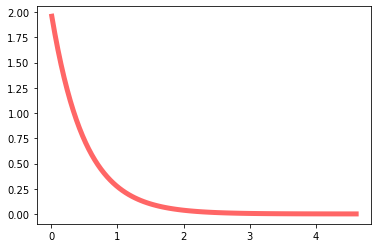

In [82]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x,loc=0, scale=(1/2)),
       'r-', lw=5, alpha=0.6, label='expon pdf')

The pdf curve should be similar to an exponential descending graph. The graph starts from 2 at x=0 and as x increases gradually decreases.

The area under the pdf curve in each interval should be equal to our result.

the pdf graph is higher in the interval [0, 1] than [1, 10] so the answer is greater.

same situation for [0, +inf) and [1, 10]. the area covered by the first interval is more. So, that is why our answer is greater.

For [1, 1], the length of the interval is zero so the area under the graph is zero.

The area under [0, +inf) is more than [0, 1] so the answer is greater.

# Q4


In [83]:
from scipy.integrate import quad

expon_pdf = lambda x: expon.pdf(x, loc=0, scale=(1/2))

In [84]:
scipy.integrate.quad(expon_pdf, 0, 1)


(0.8646647167633872, 9.59970677131702e-15)

In [85]:
scipy.integrate.quad(expon_pdf, 1, 1)


(0.0, 0.0)

In [86]:
scipy.integrate.quad(expon_pdf, 1, 10)


(0.13533528117545912, 2.4502060294750595e-09)

In [87]:
scipy.integrate.quad(expon_pdf, 0, float('inf'))


(1.0, 1.5470063370305476e-10)

If we ignore the error, the answers for Q3 and Q4 are the same. This is because if we take the integral from the pdf function, we get cdf and if we calculate the derivative of the cdf function, we get pdf. So the area under the pdf curve is equal to cdf.